In [2]:
#############################################################
#
#
#             Estimating Brain Weight via Head Size
#
#
#############################################################

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
braindata = pd.read_csv('brain_size.csv')

In [3]:
brainhead = braindata
brainhead

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


Text(0, 0.5, 'Brain Weight')

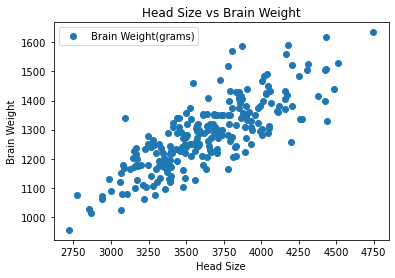

In [4]:
brainhead.plot(x='Head Size(cm^3)', y='Brain Weight(grams)',style = 'o')
plt.title('Head Size vs Brain Weight')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')

In [5]:
x = brainhead['Head Size(cm^3)'].values.reshape(-1,1)
y = brainhead['Brain Weight(grams)'].values.reshape(-1,1)

In [6]:
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [7]:
print(regressor.intercept_)
print(regressor.coef_)

[325.57342105]
[[0.26342934]]


In [8]:
#########################################################3
#
#     h(x) = 156.90931668 + 0.30537275 * mintemp
#
#########################################################

In [9]:
y_prediction = regressor.predict(x)

In [10]:
df = pd.DataFrame({'Actual: ': y.flatten(), 'Predicted : ': y_prediction.flatten()})
df

,Actual:,Predicted :
0,1530,1514.166601
1,1297,1310.272292
2,1335,1448.045837
3,1282,1320.546036
4,1590,1425.917772
...,...,...
232,1110,1172.235318
233,1215,1219.652599
234,1104,1177.240476
235,1170,1208.588567


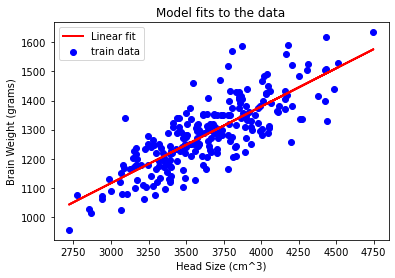

In [11]:
plt.scatter(x,y,c="blue")
plt.plot(x,y_prediction,color="red",linewidth=2)
plt.title("Model fits to the data")
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.legend(loc= 'upper left',labels=['Linear fit','train data'])
plt.show()

In [12]:
#############################################################
#
#
#             Predict Housing Price in Boston
#
#
#############################################################

In [16]:
train_data = pd.read_csv('housing_train.csv')
test_data = pd.read_csv('housing_test.csv')

In [17]:
train_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.35809,0.0,6.20,1,0.507,6.951,88.5,2.8617,8,307,17.4,391.70,9.71,26.7
1,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88,21.7
2,0.11329,30.0,4.93,0,0.428,6.897,54.3,6.3361,6,300,16.6,391.25,11.38,22.0
3,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
4,25.94060,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64,10.4


Text(0, 0.5, 'owner-occupied homes in $1000')

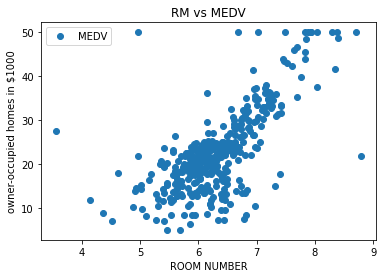

In [18]:
train_data.plot(x='RM',y='MEDV',style = 'o')
plt.title('RM vs MEDV')
plt.xlabel('ROOM NUMBER')
plt.ylabel('owner-occupied homes in $1000')

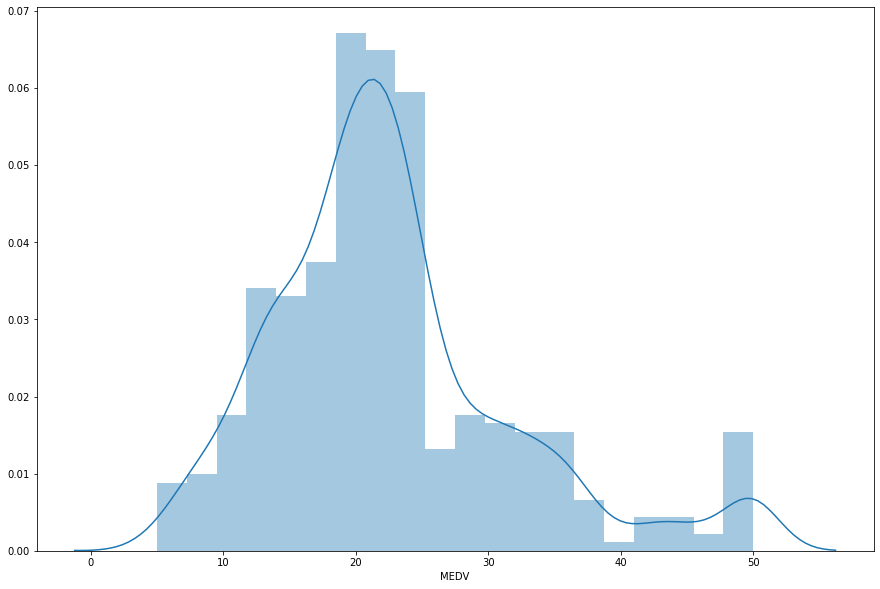

In [19]:
import seaborn as seabornInstance
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(train_data['MEDV'])

In [20]:
train_data.shape

(404, 14)

In [21]:
test_data.shape

(102, 14)

In [22]:
a_train = train_data.iloc[:,0:-1]
b_train = train_data['MEDV']

In [23]:
regressor = LinearRegression()

In [24]:
regressor.fit(a_train,b_train)

LinearRegression()

In [25]:
pd.DataFrame(regressor.coef_,a_train.columns,columns=['Coef'])

,Coef
CRIM,-0.119443
ZN,0.044780
INDUS,0.005485
CHAS,2.340804
NOX,-16.123604
RM,3.708709
AGE,-0.003121
DIS,-1.386397
RAD,0.244178
TAX,-0.010990


In [26]:
a_test = test_data.iloc[:,0:-1]
b_test = test_data['MEDV']
b_pred = regressor.predict(a_test)

In [27]:
df = pd.DataFrame({'actual value':b_test, 'predicted: ': b_pred})
df2 = df.head(25)
df2

,actual value,predicted:
0,22.6,24.889638
1,50.0,23.721411
2,23.0,29.364999
3,8.3,12.122386
4,21.2,21.443823
5,19.9,19.283444
6,20.6,20.496475
7,18.7,21.360993
8,16.1,18.896712
9,18.6,19.928066


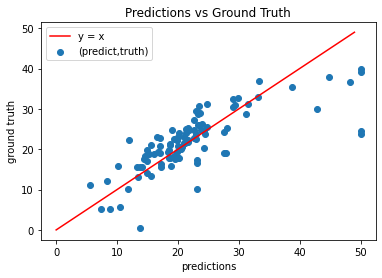

In [28]:
plt.scatter(b_test,b_pred)
plt.title('Predictions vs Ground Truth')
plt.xlabel('predictions')
plt.ylabel('ground truth')
plt.plot(range(50),c = 'red')
plt.legend(loc= 'upper left',labels=['y = x','(predict,truth)'])